# 1 - Perkenalan

> Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan objective yang ingin dicapai.

- Nama : Efitri Apriliyan S


- Batch : 015 - RMT


- Objective : Membuat model clustering untuk melakukan Customer Segmentation dari data kartu kredit sebuah bank. 


- Dataset: Data informasi penggunaan kartu kredit selama 6 bulan terakhir yang diperoleh dari Google Cloud dengan menggunakan query sebagai berikut:

SELECT *


FROM `ftds-hacktiv8-project.phase1_ftds_015_rmt.credit-card-information`


WHERE MOD(CUST_ID,2) <> 0;



# 2 - Import Libraries

> Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [1]:
# Library yang digunakan

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering, DBSCAN
from sklearn.datasets import make_moons
import matplotlib as mpl
from matplotlib.ticker import FixedLocator, FixedFormatter
import warnings

import joblib
import json
warnings.simplefilter("ignore")

In [2]:
# Untuk menghandle outlier
!pip install feature-engine

from feature_engine.outliers import Winsorizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 276 kB 14.2 MB/s 


# 3 - Data Loading

> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.



In [3]:
# Loading data
df = pd.read_csv('h8dsft_P1G4_Efitri_Apriliyan.csv')

In [4]:
# menampilkan 10 data awal
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3091,3.833185,0.125000,45.00,45.00,0.00,0.0,0.125,0.125,0.00,0.0,0,1,500.0,0.000000,NaN,0.000000,8
1,5069,0.000000,0.000000,176.03,176.03,0.00,0.0,0.125,0.125,0.00,0.0,0,1,7000.0,0.000000,NaN,0.000000,8
2,6075,757.964752,0.875000,157.40,157.40,0.00,0.0,0.125,0.125,0.00,0.0,0,6,1200.0,1494.480376,2638.598410,0.000000,8
3,6291,264.566591,0.375000,1150.00,1150.00,0.00,0.0,0.125,0.125,0.00,0.0,0,1,1200.0,3029.380326,85.428885,0.000000,8
4,7755,440.613643,1.000000,600.00,600.00,0.00,0.0,0.125,0.125,0.00,0.0,0,1,1000.0,215.316424,137.846006,0.000000,8
5,8299,611.561026,1.000000,765.00,765.00,0.00,0.0,0.125,0.125,0.00,0.0,0,1,2000.0,204.464151,146.352314,0.000000,8
6,8629,0.228572,0.125000,60.00,60.00,0.00,0.0,0.125,0.125,0.00,0.0,0,1,1500.0,438.738982,NaN,0.000000,8
7,8805,105.333584,0.375000,306.00,306.00,0.00,0.0,0.125,0.125,0.00,0.0,0,2,6000.0,101.986927,118.324082,0.000000,8
8,7,16.379412,0.454545,178.15,0.00,178.15,0.0,0.250,0.000,0.25,0.0,0,3,5000.0,229.376368,89.613822,0.181818,12
9,91,559.151424,1.000000,94.00,94.00,0.00,0.0,0.250,0.250,0.00,0.0,0,3,5500.0,254.733329,218.279194,0.000000,12


In [5]:
# Menampilkan 10 data terakhir
df.tail(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4465,6809,4438.521324,1.000000,591.84,109.16,482.68,564.365429,0.636364,0.181818,0.454545,0.272727,3,11,17000.0,5552.601399,1094.486286,0.00,11
4466,7211,1135.703750,1.000000,92.07,0.00,92.07,81.509491,0.272727,0.000000,0.181818,0.272727,3,3,1200.0,355.798199,434.689529,0.00,11
4467,8295,185.984965,0.454545,482.24,392.24,90.00,903.843591,0.272727,0.181818,0.090909,0.272727,8,8,1200.0,2333.997439,160.900585,0.25,11
4468,8855,3531.167073,0.900000,797.50,577.83,219.67,5273.226918,0.700000,0.400000,0.500000,0.900000,33,21,4000.0,2979.546700,3052.080103,0.00,10
4469,2389,1917.895730,1.000000,285.07,285.07,0.00,6084.858872,0.363636,0.363636,0.000000,1.090909,28,6,3000.0,5692.682993,556.449635,0.00,11
4470,2345,9629.808851,1.000000,0.00,0.00,0.00,4372.393835,0.000000,0.000000,0.000000,0.545455,9,0,12000.0,2468.988022,2134.295731,0.00,11
4471,6785,1040.030221,1.000000,0.00,0.00,0.00,1390.648290,0.000000,0.000000,0.000000,0.545455,18,0,1400.0,290.129620,287.994171,0.00,11
4472,7347,1322.818587,1.000000,0.00,0.00,0.00,762.301096,0.000000,0.000000,0.000000,0.545455,11,0,1500.0,1035.627320,312.835530,0.00,11
4473,8447,1060.391273,1.000000,0.00,0.00,0.00,1475.858013,0.000000,0.000000,0.000000,0.545455,10,0,2000.0,407.360560,277.084736,0.00,11
4474,1995,3447.674222,1.000000,205.00,205.00,0.00,4548.057776,0.090909,0.090909,0.000000,0.545455,7,1,10500.0,665.239171,817.844662,0.00,11


In [6]:
df_copy = df.copy()

In [7]:
# Mengecek data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

Terdapat 4475 baris dan 18 kolom data, dengan 14 kolom tipe float dan 4 kolom data tipe integer, dimana ada 1 kolom yang memiliki data null yaitu pada kolom Minimum_Payments.

# 4 - Exploratory Data Analysis (EDA)

> Bagian ini berisi explorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.



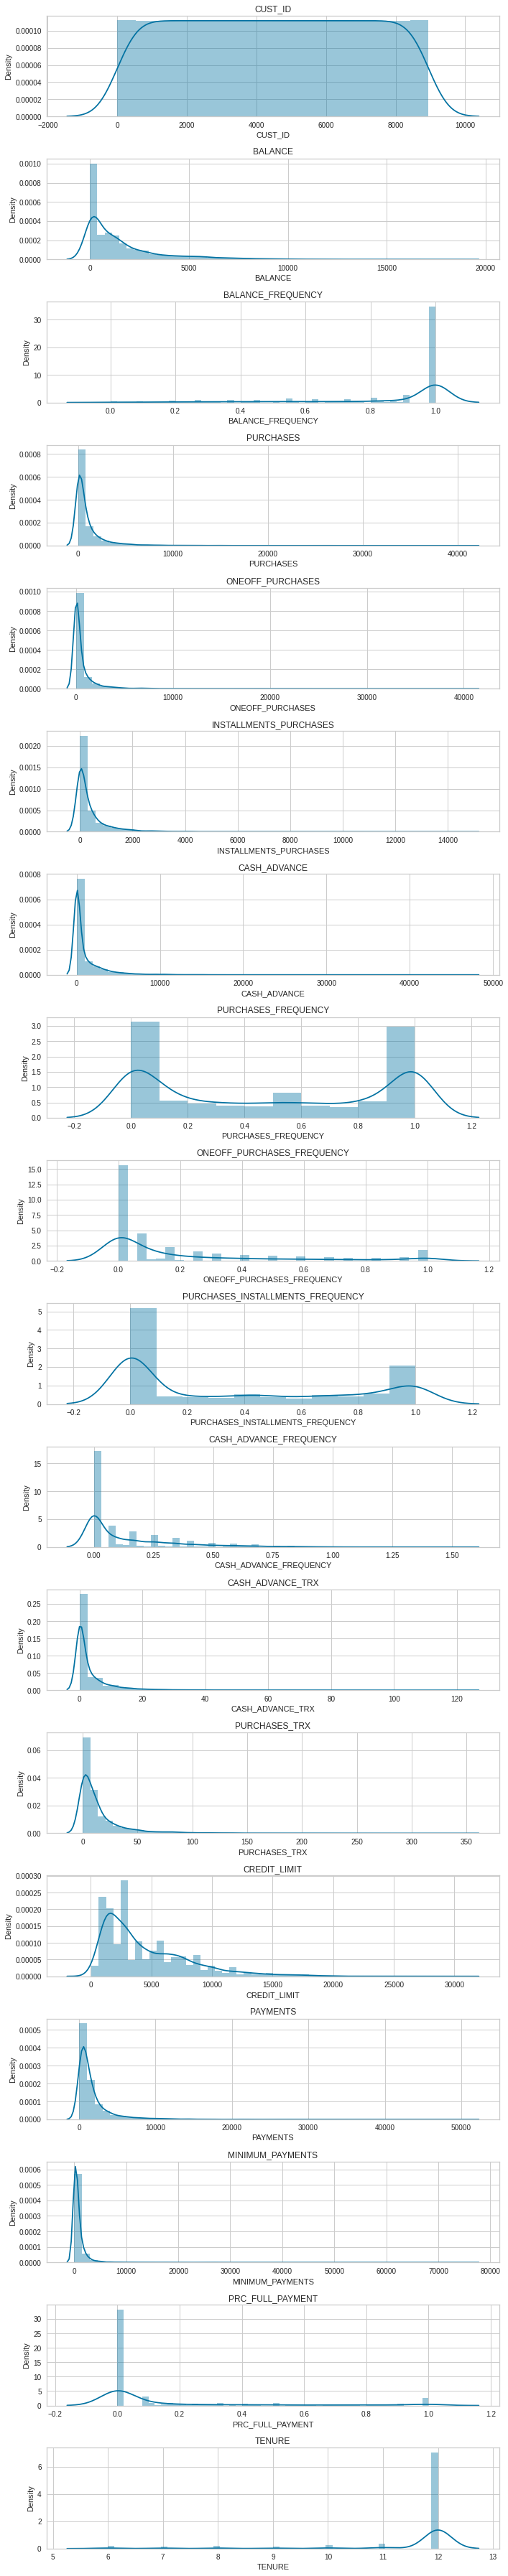

In [8]:
# histplot of columns 

plt.figure(figsize=(10,50))
for i in range(len(df.columns)):
  plt.subplot(18, 1, i + 1)
  sns.distplot(df[df.columns[i]], kde = True)
  plt.title(df.columns[i])
plt.tight_layout();

Semua kolom terdistribusi right skewed kecuali kolom Tenure dan Balance Frequency.

Text(0.5, 1.0, 'Number of amount from BALANCE')

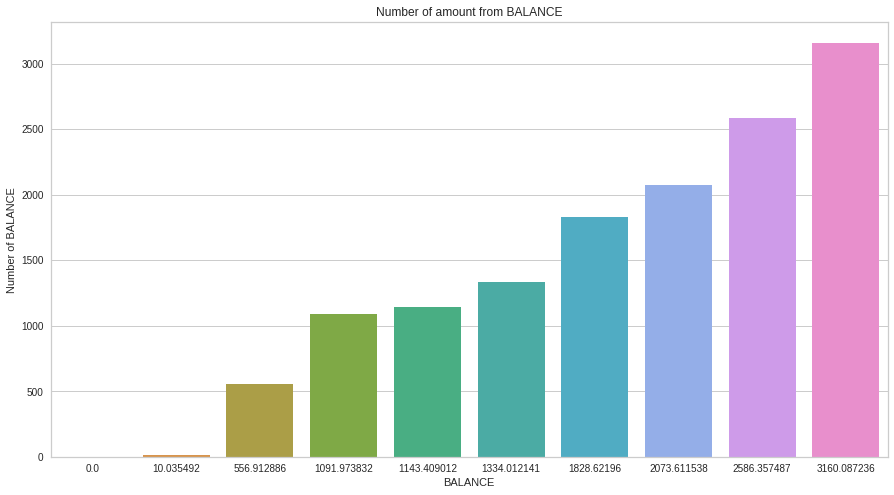

In [9]:
#Melihat grafik berdasarkan nilai balance
limit_balance_df = df['BALANCE'].value_counts().reset_index().rename(columns={'index': 'BALANCE','BALANCE': 'count of BALANCE'})[:10]

plt.figure(figsize=(15, 8))
sns.barplot(x=limit_balance_df['BALANCE'], y=limit_balance_df['BALANCE'])
plt.xlabel("BALANCE")
plt.ylabel("Number of BALANCE")
plt.title("Number of amount from BALANCE")

Balance terbesar dengan nominal 3160.087 dollar.

Text(0.5, 1.0, 'Number of amount from CASH_ADVANCE')

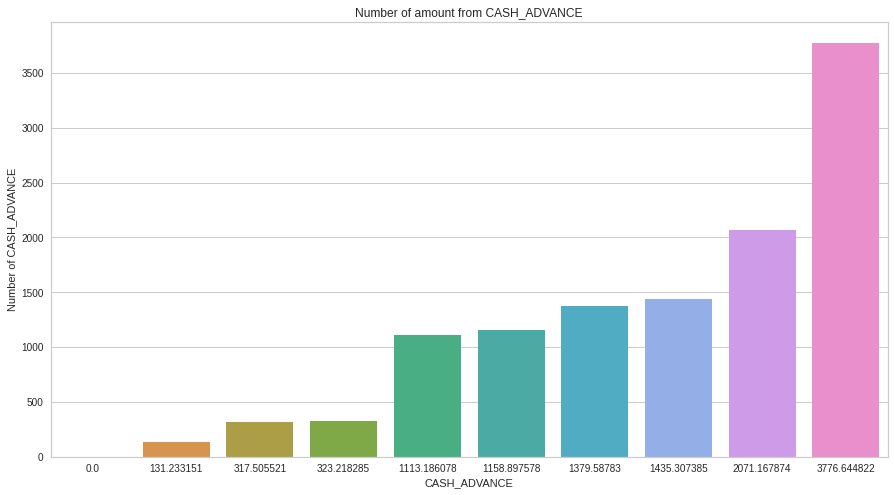

In [10]:
#Melihat grafik berdasarkan nilai CASH_ADVANCE
CASH_ADVANCE_df = df['CASH_ADVANCE'].value_counts().reset_index().rename(columns={'index': 'CASH_ADVANCE','CASH_ADVANCE': 'count of CASH_ADVANCE'})[:10]

plt.figure(figsize=(15, 8))
sns.barplot(x=CASH_ADVANCE_df['CASH_ADVANCE'], y=CASH_ADVANCE_df['CASH_ADVANCE'])
plt.xlabel("CASH_ADVANCE")
plt.ylabel("Number of CASH_ADVANCE")
plt.title("Number of amount from CASH_ADVANCE")

Nominal CASH_ADVANCE yang paling banyak dilakukan nasabah adalah 3776.64 dollar.

Text(0.5, 1.0, 'Number of amount from PURCHASES')

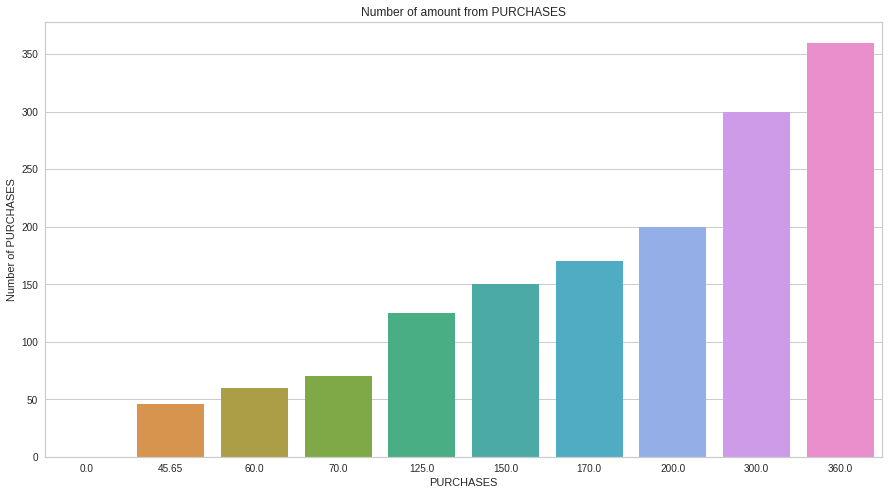

In [11]:
#Melihat grafik berdasarkan nilai PURCHASE
PURCHASE_df = df['PURCHASES'].value_counts().reset_index().rename(columns={'index': 'PURCHASES','PURCHASES': 'count of PURCHASES'})[:10]

plt.figure(figsize=(15, 8))
sns.barplot(x=PURCHASE_df['PURCHASES'], y=PURCHASE_df['PURCHASES'])
plt.xlabel("PURCHASES")
plt.ylabel("Number of PURCHASES")
plt.title("Number of amount from PURCHASES")

PURCHASES terbanyak yang dilakukan nasabah adalah sebesar 360 dollar.

# 5 - Data Preprocessing

> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-set dan inference-set, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.



## Get Data For Model Inference

In [12]:
# Mengambil Data untuk Model Inference, sebanyak 10 data.
data_inf = df.sample(10, random_state=1) #1 adalah angka dipilih random, supaya data tidak berubah2
data_inf

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2093,4703,1497.869891,1.000000,806.64,681.69,124.95,0.000000,0.833333,0.750000,0.416667,0.000000,0,26,1700.0,826.296904,857.418392,0.000000,12
3080,7433,22.187914,1.000000,0.00,0.00,0.00,147.485270,0.000000,0.000000,0.000000,0.083333,1,0,3000.0,182.533898,155.060934,0.083333,12
3533,8319,2261.132204,0.888889,0.00,0.00,0.00,840.322560,0.000000,0.000000,0.000000,0.333333,4,0,2500.0,783.359871,609.884322,0.000000,9
2053,1851,11.834127,0.166667,272.90,69.90,203.00,0.000000,0.833333,0.166667,0.500000,0.000000,0,5,6000.0,313.913093,81.433073,1.000000,6
2900,1061,1116.443170,1.000000,0.00,0.00,0.00,18.904244,0.000000,0.000000,0.000000,0.083333,1,0,1200.0,264.159577,312.807548,0.000000,12
1924,2665,601.688280,0.800000,1358.20,468.33,889.87,0.000000,0.800000,0.200000,0.700000,0.000000,0,26,1500.0,310.912113,157.872552,0.000000,10
644,3545,31.050921,1.000000,446.05,0.00,446.05,0.000000,1.000000,0.000000,0.909091,0.000000,0,11,1000.0,387.745745,158.394845,1.000000,11
3758,739,1055.369866,0.545455,0.00,0.00,0.00,3776.644822,0.000000,0.000000,0.000000,0.166667,2,0,6000.0,2924.470714,195.294122,0.000000,12
2410,5977,827.000420,1.000000,0.00,0.00,0.00,965.526999,0.000000,0.000000,0.000000,0.250000,20,0,1000.0,333.441983,326.953822,0.000000,12
2334,575,204.584048,0.818182,0.00,0.00,0.00,628.366944,0.000000,0.000000,0.000000,0.250000,3,0,1600.0,1933.810453,152.106855,0.000000,12


In [13]:
# Memisahkan Inference-Set dari Dataset
data = df.drop(data_inf.index)
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3091,3.833185,0.125,45.00,45.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,500.0,0.000000,NaN,0.0,8
1,5069,0.000000,0.000,176.03,176.03,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,7000.0,0.000000,NaN,0.0,8
2,6075,757.964752,0.875,157.40,157.40,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,6,1200.0,1494.480376,2638.598410,0.0,8
3,6291,264.566591,0.375,1150.00,1150.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1200.0,3029.380326,85.428885,0.0,8
4,7755,440.613643,1.000,600.00,600.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1000.0,215.316424,137.846006,0.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,2345,9629.808851,1.000,0.00,0.00,0.0,4372.393835,0.000000,0.000000,0.0,0.545455,9,0,12000.0,2468.988022,2134.295731,0.0,11
4471,6785,1040.030221,1.000,0.00,0.00,0.0,1390.648290,0.000000,0.000000,0.0,0.545455,18,0,1400.0,290.129620,287.994171,0.0,11
4472,7347,1322.818587,1.000,0.00,0.00,0.0,762.301096,0.000000,0.000000,0.0,0.545455,11,0,1500.0,1035.627320,312.835530,0.0,11
4473,8447,1060.391273,1.000,0.00,0.00,0.0,1475.858013,0.000000,0.000000,0.0,0.545455,10,0,2000.0,407.360560,277.084736,0.0,11


In [14]:
#Reset Index

data.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,4703,1497.869891,1.000000,806.64,681.69,124.95,0.000000,0.833333,0.750000,0.416667,0.000000,0,26,1700.0,826.296904,857.418392,0.000000,12
1,7433,22.187914,1.000000,0.00,0.00,0.00,147.485270,0.000000,0.000000,0.000000,0.083333,1,0,3000.0,182.533898,155.060934,0.083333,12
2,8319,2261.132204,0.888889,0.00,0.00,0.00,840.322560,0.000000,0.000000,0.000000,0.333333,4,0,2500.0,783.359871,609.884322,0.000000,9
3,1851,11.834127,0.166667,272.90,69.90,203.00,0.000000,0.833333,0.166667,0.500000,0.000000,0,5,6000.0,313.913093,81.433073,1.000000,6
4,1061,1116.443170,1.000000,0.00,0.00,0.00,18.904244,0.000000,0.000000,0.000000,0.083333,1,0,1200.0,264.159577,312.807548,0.000000,12
5,2665,601.688280,0.800000,1358.20,468.33,889.87,0.000000,0.800000,0.200000,0.700000,0.000000,0,26,1500.0,310.912113,157.872552,0.000000,10
6,3545,31.050921,1.000000,446.05,0.00,446.05,0.000000,1.000000,0.000000,0.909091,0.000000,0,11,1000.0,387.745745,158.394845,1.000000,11
7,739,1055.369866,0.545455,0.00,0.00,0.00,3776.644822,0.000000,0.000000,0.000000,0.166667,2,0,6000.0,2924.470714,195.294122,0.000000,12
8,5977,827.000420,1.000000,0.00,0.00,0.00,965.526999,0.000000,0.000000,0.000000,0.250000,20,0,1000.0,333.441983,326.953822,0.000000,12
9,575,204.584048,0.818182,0.00,0.00,0.00,628.366944,0.000000,0.000000,0.000000,0.250000,3,0,1600.0,1933.810453,152.106855,0.000000,12


## Handling Missing Values

In [15]:
#Mengecek Missing Values
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    155
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Terdapat 155 data null pada kolom 'Minimum Payments'. Selanjutnya kita akan menghandle missing values dengan menggunakan mediannya.

In [16]:
median = data['MINIMUM_PAYMENTS'].median()
data['MINIMUM_PAYMENTS'].fillna(median, inplace=True)

In [17]:
#Mengecek Missing Values
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Sudah tidak terdapat missing values pada kolom MINIMUM_PAYMENTS

##Handling Outliers

In [18]:
# Fungsi untuk membuat histogram dan boxplot.
# Fungsi ini mengambil dataframe (df) dan variable yang akan dilihat distribusinya

def diagnostic_plots(data, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=data[variable])
    plt.title('Boxplot')

    plt.show()

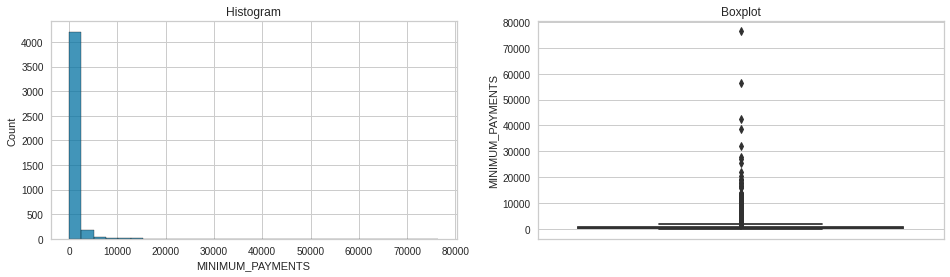


Skewness Value :  14.89843635095107


In [20]:
# variabel yang digunakan adalah 'BALANCE' dari data 

diagnostic_plots(data, 'MINIMUM_PAYMENTS')
print('\nSkewness Value : ', data['MINIMUM_PAYMENTS'].skew())

In [21]:
# Create the capper

windsorizer = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['BALANCE','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX','PURCHASES_TRX','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','TENURE'])

windsorizer.fit(data)

#transform caping ke data
data_t = windsorizer.transform(data)

In [22]:
# Inspect the minimum caps for each variable
print('Left Tail Caps  : ', windsorizer.left_tail_caps_)

# Iinspect the maximum caps for each variable
print('Right Tail Caps : ', windsorizer.right_tail_caps_)

Left Tail Caps  :  {'BALANCE': -2771.0250165, 'PURCHASES': -1557.5, 'ONEOFF_PURCHASES': -866.7450000000001, 'INSTALLMENTS_PURCHASES': -684.075, 'CASH_ADVANCE': -1721.8372935, 'PURCHASES_FREQUENCY': -1.166668, 'ONEOFF_PURCHASES_FREQUENCY': -0.375, 'PURCHASES_INSTALLMENTS_FREQUENCY': -1.125, 'CASH_ADVANCE_FREQUENCY': -0.375, 'CASH_ADVANCE_TRX': -6.0, 'PURCHASES_TRX': -23.0, 'CREDIT_LIMIT': -5750.0, 'PAYMENTS': -1924.8953064999998, 'MINIMUM_PAYMENTS': -752.4506820000001, 'PRC_FULL_PAYMENT': -0.1875, 'TENURE': 12.0}
Right Tail Caps :  {'BALANCE': 4950.5883875, 'PURCHASES': 2702.5, 'ONEOFF_PURCHASES': 1444.5750000000003, 'INSTALLMENTS_PURCHASES': 1140.125, 'CASH_ADVANCE': 2869.7288225, 'PURCHASES_FREQUENCY': 2.166668, 'ONEOFF_PURCHASES_FREQUENCY': 0.625, 'PURCHASES_INSTALLMENTS_FREQUENCY': 1.875, 'CASH_ADVANCE_FREQUENCY': 0.625, 'CASH_ADVANCE_TRX': 10.0, 'PURCHASES_TRX': 41.0, 'CREDIT_LIMIT': 13850.0, 'PAYMENTS': 4216.0897695, 'MINIMUM_PAYMENTS': 1709.330062, 'PRC_FULL_PAYMENT': 0.3125, 'TE

In [23]:
# Distribusi data sebelum dan sesudah capping
print('Age Dataframe - Before Capping')
print(data.describe())
print('')
print('Age Dataframe - After Capping')
print(data_t.describe())

Age Dataframe - Before Capping
           CUST_ID       BALANCE  BALANCE_FREQUENCY     PURCHASES  \
count  4465.000000   4465.000000        4465.000000   4465.000000   
mean   4476.765286   1564.998079           0.877057   1004.852401   
std    2583.457261   2073.749439           0.238160   2061.957408   
min       1.000000      0.000000           0.000000      0.000000   
25%    2241.000000    124.580010           0.888889     40.000000   
50%    4477.000000    872.071080           1.000000    360.300000   
75%    6713.000000   2054.983361           1.000000   1105.000000   
max    8949.000000  18495.558550           1.000000  41050.400000   

       ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
count       4465.000000             4465.000000   4465.000000   
mean         597.432329              407.649348    985.064732   
std         1655.087731              881.614052   2062.023870   
min            0.000000                0.000000      0.000000   
25%            0.00000

age - Before Capping


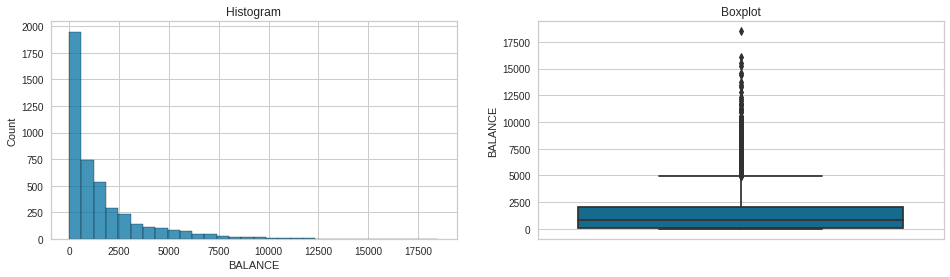


age - After Capping


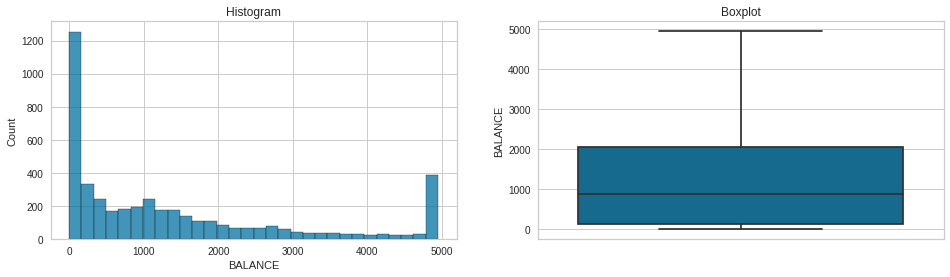

age - Before Capping


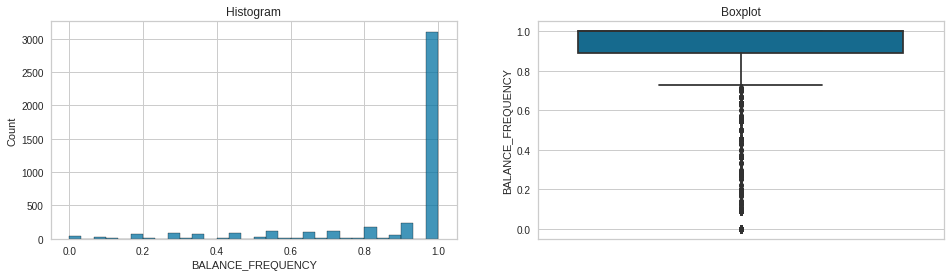


age - After Capping


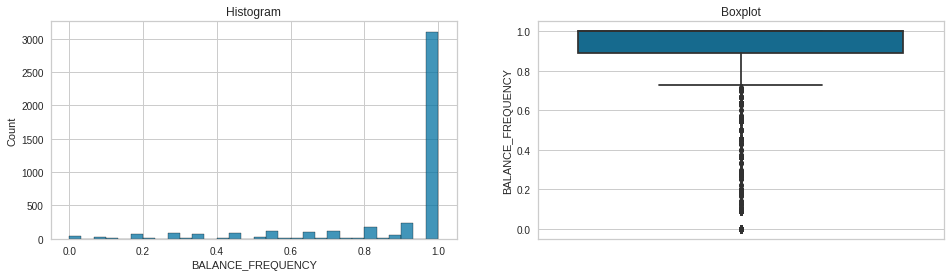

age - Before Capping


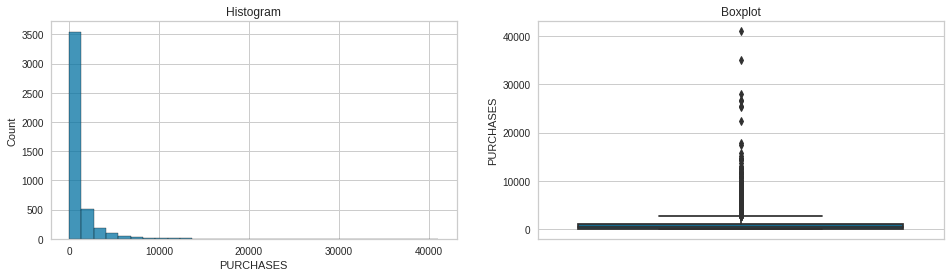


age - After Capping


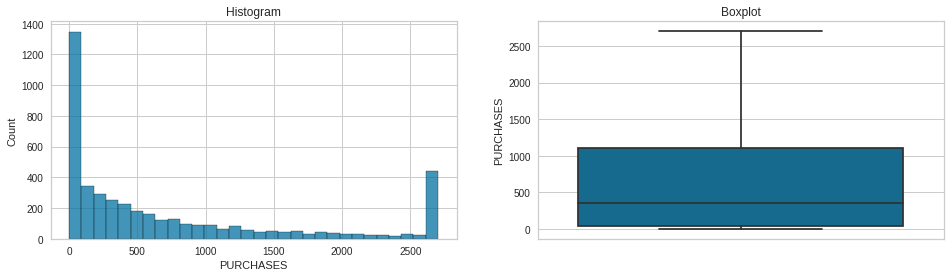

age - Before Capping


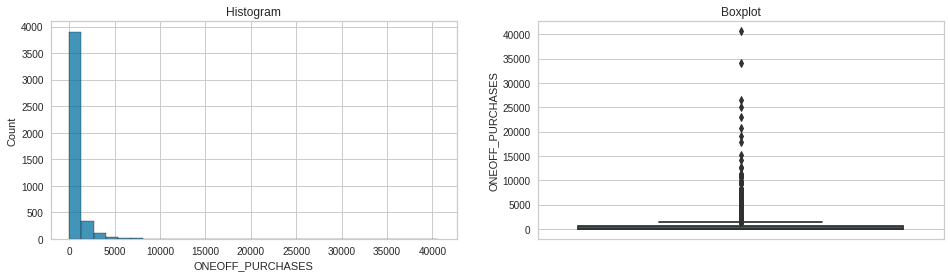


age - After Capping


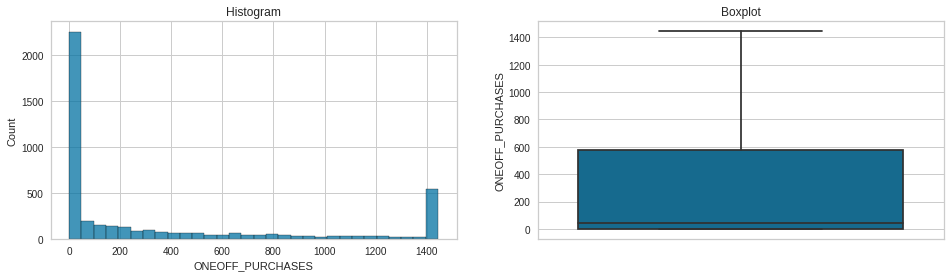

age - Before Capping


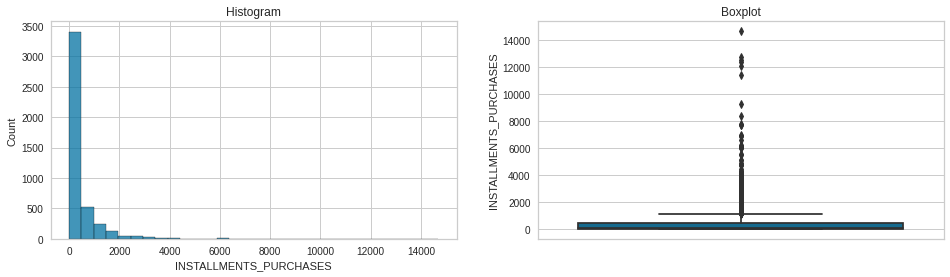


age - After Capping


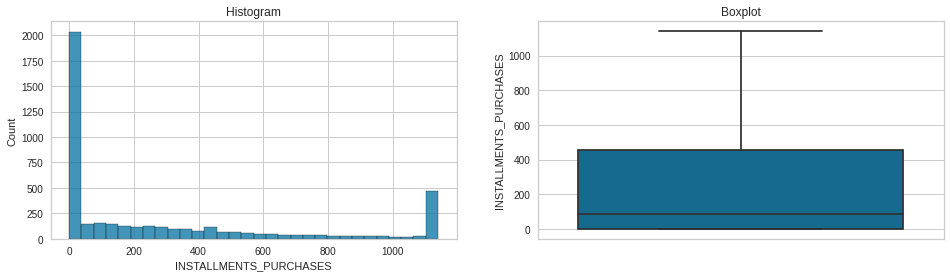

In [24]:
# Let's find outliers in `BALANCE`, BALANCE_FREQUENCY PURCHASES ONEOFF_PURCHASES

print('age - Before Capping')
diagnostic_plots(data, 'BALANCE')
print('\nage - After Capping')
diagnostic_plots(data_t, 'BALANCE')


print('age - Before Capping')
diagnostic_plots(data, 'BALANCE_FREQUENCY')
print('\nage - After Capping')
diagnostic_plots(data_t, 'BALANCE_FREQUENCY')

print('age - Before Capping')
diagnostic_plots(data, 'PURCHASES')
print('\nage - After Capping')
diagnostic_plots(data_t, 'PURCHASES')


print('age - Before Capping')
diagnostic_plots(data, 'ONEOFF_PURCHASES')
print('\nage - After Capping')
diagnostic_plots(data_t, 'ONEOFF_PURCHASES')


print('age - Before Capping')
diagnostic_plots(data, 'INSTALLMENTS_PURCHASES')
print('\nage - After Capping')
diagnostic_plots(data_t, 'INSTALLMENTS_PURCHASES')

Kita sudah menghandle semua outlier pada dataset. Grafik setelah dihandle outlier dapat dilihat pada beberapa boxplot di atas.

## Feature Selection

Pada Feature Selection kali ini kita akan menghapus kolom CUST_ID karena tidak berhubungan dengan proses clustring.

In [25]:
# menghapus kolom CUST_ID
data_t.drop(['CUST_ID'], axis=1, inplace=True)

In [26]:
data_t

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3.833185,0.125,45.00,45.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0.0,1.0,500.0,0.000000,314.386305,0.0,12.0
1,0.000000,0.000,176.03,176.03,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0.0,1.0,7000.0,0.000000,314.386305,0.0,12.0
2,757.964752,0.875,157.40,157.40,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0.0,6.0,1200.0,1494.480376,1709.330062,0.0,12.0
3,264.566591,0.375,1150.00,1150.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0.0,1.0,1200.0,3029.380326,85.428885,0.0,12.0
4,440.613643,1.000,600.00,600.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0.0,1.0,1000.0,215.316424,137.846006,0.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4460,4950.588387,1.000,0.00,0.00,0.0,2869.728823,0.000000,0.000000,0.0,0.545455,9.0,0.0,12000.0,2468.988022,1709.330062,0.0,12.0
4461,1040.030221,1.000,0.00,0.00,0.0,1390.648290,0.000000,0.000000,0.0,0.545455,10.0,0.0,1400.0,290.129620,287.994171,0.0,12.0
4462,1322.818587,1.000,0.00,0.00,0.0,762.301096,0.000000,0.000000,0.0,0.545455,10.0,0.0,1500.0,1035.627320,312.835530,0.0,12.0
4463,1060.391273,1.000,0.00,0.00,0.0,1475.858013,0.000000,0.000000,0.0,0.545455,10.0,0.0,2000.0,407.360560,277.084736,0.0,12.0


## Feature Scaling

In [27]:
#Feature Scaling using Standard Scaler
scaler = StandardScaler()

In [28]:
data_scaled = scaler.fit_transform(data_t)

In [29]:
data_scaled

array([[-0.89833158, -3.15813012, -0.784125  , ..., -0.45678657,
        -0.63374986,  0.        ],
       [-0.90080848, -3.68304577, -0.63527007, ..., -0.45678657,
        -0.63374986,  0.        ],
       [-0.41103271, -0.00863619, -0.65643444, ...,  2.13967801,
        -0.63374986,  0.        ],
       ...,
       [-0.04603986,  0.51627947, -0.83524666, ..., -0.45967309,
        -0.63374986,  0.        ],
       [-0.2156131 ,  0.51627947, -0.83524666, ..., -0.52621747,
        -0.63374986,  0.        ],
       [ 1.32698281,  0.51627947, -0.60235908, ...,  0.4803206 ,
        -0.63374986,  0.        ]])

In [30]:
#merubah ke data frame
data_scaled = pd.DataFrame(data_scaled, columns=['BALANCE','BALANCE_FREQUENCY','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX','PURCHASES_TRX','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','TENURE']) #merubah ke dataframe


In [31]:
data_scaled

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.898332,-3.158130,-0.784125,-0.604623,-0.74917,-0.677576,-0.908514,-0.202612,-0.915699,-0.716512,-0.699786,-0.813212,-1.164607,-1.057819,-0.456787,-0.63375,0.0
1,-0.900808,-3.683046,-0.635270,-0.348892,-0.74917,-0.677576,-0.908514,-0.202612,-0.915699,-0.716512,-0.699786,-0.813212,0.761655,-1.057819,-0.456787,-0.63375,0.0
2,-0.411033,-0.008636,-0.656434,-0.385252,-0.74917,-0.677576,-0.908514,-0.202612,-0.915699,-0.716512,-0.699786,-0.433099,-0.957163,0.102181,2.139678,-0.63375,0.0
3,-0.729853,-2.108299,0.471196,1.552002,-0.74917,-0.677576,-0.908514,-0.202612,-0.915699,-0.716512,-0.699786,-0.813212,-0.957163,1.293554,-0.882954,-0.63375,0.0
4,-0.616096,0.516279,-0.153624,0.478569,-0.74917,-0.677576,-0.908514,-0.202612,-0.915699,-0.716512,-0.699786,-0.813212,-1.016433,-0.890693,-0.785388,-0.63375,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4460,2.298124,0.516279,-0.835247,-0.692449,-0.74917,2.112663,-1.218882,-0.756213,-0.915699,2.283744,1.932026,-0.889234,2.243395,0.858583,2.139678,-0.63375,0.0
4461,-0.228770,0.516279,-0.835247,-0.692449,-0.74917,0.674552,-1.218882,-0.756213,-0.915699,2.283744,2.224449,-0.889234,-0.897893,-0.832623,-0.505911,-0.63375,0.0
4462,-0.046040,0.516279,-0.835247,-0.692449,-0.74917,0.063610,-1.218882,-0.756213,-0.915699,2.283744,2.224449,-0.889234,-0.868259,-0.253976,-0.459673,-0.63375,0.0
4463,-0.215613,0.516279,-0.835247,-0.692449,-0.74917,0.757401,-1.218882,-0.756213,-0.915699,2.283744,2.224449,-0.889234,-0.720085,-0.741630,-0.526217,-0.63375,0.0


## VIF

In [32]:
# cek multicollinearity

vif = pd.DataFrame()
vif["feature"] = data_scaled.columns

# calculating VIF from each feature
vif["VIF"] =[variance_inflation_factor(data_scaled.values, i) for i in range(len(data_scaled.columns))]

vif

,feature,VIF
0,BALANCE,5.868307
1,BALANCE_FREQUENCY,1.349360
2,PURCHASES,16.534691
3,ONEOFF_PURCHASES,11.094727
4,INSTALLMENTS_PURCHASES,7.352739
5,CASH_ADVANCE,3.648114
6,PURCHASES_FREQUENCY,10.563483
7,ONEOFF_PURCHASES_FREQUENCY,6.490591
8,PURCHASES_INSTALLMENTS_FREQUENCY,12.000959
9,CASH_ADVANCE_FREQUENCY,7.742060


Terdapat **10** kolom yang bernilai **di atas 5** dan **6** kolom yang bernilai **dibawah 5**.
Dapat diprediksi bahwa jika dilakukan reduksi dimensi maka dapat direduksi paling tidak sampai 10 dimensi.

## Reduksi Dimensi Menggunakan PCA

In [33]:
pca_scaled = PCA(n_components=17).fit(data_scaled)
pca_scaled.explained_variance_ratio_

array([0.33114111, 0.25767917, 0.0965429 , 0.07548672, 0.06058043,
       0.04694144, 0.03500101, 0.02654917, 0.02020149, 0.01385022,
       0.01132729, 0.00815936, 0.00727628, 0.00407874, 0.0034244 ,
       0.00176026, 0.        ])

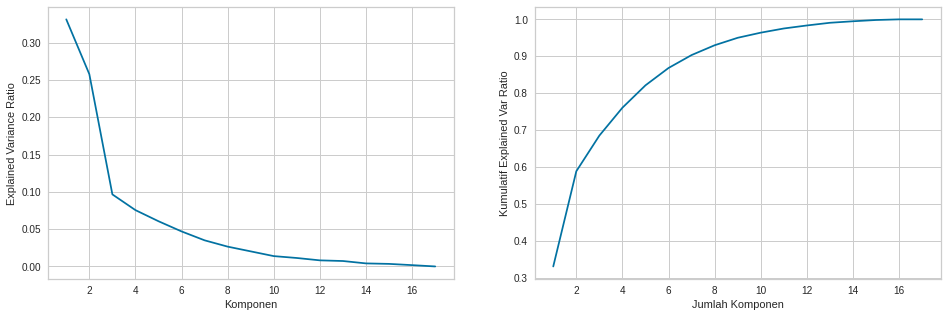

In [34]:
fig,ax=plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,18),pca_scaled.explained_variance_ratio_)
ax[0].set_xlabel('Komponen')
ax[0].set_ylabel('Explained Variance Ratio')

ax[1].plot(range(1,18),np.cumsum(pca_scaled.explained_variance_ratio_))
ax[1].set_xlabel('Jumlah Komponen')
ax[1].set_ylabel('Kumulatif Explained Var Ratio')
plt.show()

- Nampak bahwa adanya degradasi nilai EVR dari komponen pertama hingga terakhir.
- Nampak ada patahan di 6 komponen, dengan cumsum EVR 0.85, kemungkinan 6 komponen merupakan jumlah yang terbaik dengan cumsum EVR sekitar 85%, namun 8 terlihat bagus karena cumsum EVR nya mendekati 90%.

In [35]:
#pca menggunakan 8 komponen
pca = PCA(n_components=8)
pca.fit(data_scaled)
data_reduced = pca.transform(data_scaled)

In [36]:
data_reduced

array([[-1.98040033, -2.75016276,  1.11489507, ...,  2.22593373,
         0.02597353, -0.86456607],
       [-1.69695192, -2.30381808,  1.68203911, ...,  2.15471807,
        -1.07445392, -0.37205491],
       [-1.33050412, -0.45135332,  0.36850419, ..., -0.09272012,
         1.42588013, -1.15108064],
       ...,
       [-3.10726654,  1.01136565, -0.34159029, ...,  0.23532322,
         0.03504481,  0.62265916],
       [-3.27793189,  1.06873513, -0.41876143, ...,  0.2993187 ,
        -0.40071799,  0.66650241],
       [-2.71915619,  3.12904388,  0.11795431, ..., -0.38854052,
        -1.5889595 ,  0.58958017]])

In [37]:
#merubah ke dataframe
data_reduced1 = pd.DataFrame(data_reduced)
data_reduced1

,0,1,2,3,4,5,6,7
0,-1.980400,-2.750163,1.114895,-0.077865,0.782034,2.225934,0.025974,-0.864566
1,-1.696952,-2.303818,1.682039,0.228572,2.093442,2.154718,-1.074454,-0.372055
2,-1.330504,-0.451353,0.368504,-1.719458,0.422498,-0.092720,1.425880,-1.151081
3,-0.363977,-1.426654,2.527269,0.324308,0.509400,1.648992,1.669874,0.252286
4,-1.053189,-1.675551,1.057907,-1.135386,-0.885315,-0.269298,0.464196,0.562241
...,...,...,...,...,...,...,...,...
4460,-3.091119,4.757772,-0.293044,0.304397,1.321668,-0.669577,-0.630350,-0.051089
4461,-3.296037,0.967231,-0.458105,0.861257,-2.037637,0.344699,-0.352063,0.581380
4462,-3.107267,1.011366,-0.341590,0.793010,-1.810191,0.235323,0.035045,0.622659
4463,-3.277932,1.068735,-0.418761,0.931076,-1.919991,0.299319,-0.400718,0.666502


Kita sudah melakukan PCA, yaitu mereduksi beberapa dimensi agar komputasi semakin ringan dan cepat.

# 6 - Model Definition

> Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model

Pada clustering kali ini kita akan menggunakan 4 model yaitu K-means, DBSCAN dan Agglomerative

# K-means

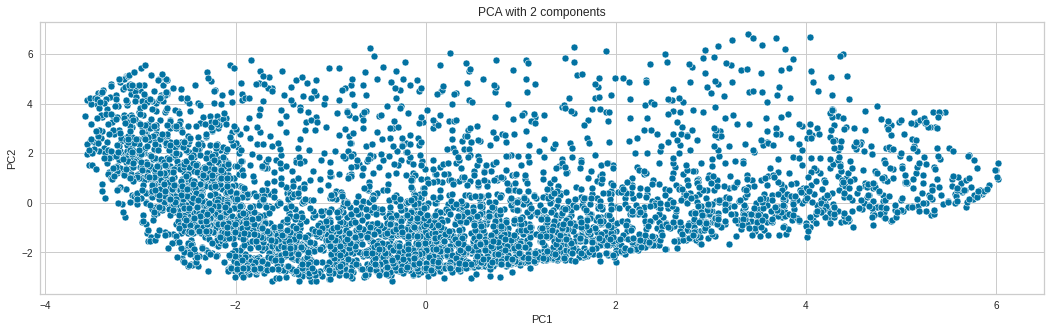

In [38]:
pca_2d = PCA(n_components=2, random_state=26)
X_2d  = pca_2d.fit_transform(data_reduced)

plt.figure(figsize=(18, 5))
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA with 2 components')
plt.show()

In [39]:
#finding optimal number of clusters
kmeans_per_k = [KMeans(n_clusters=k, random_state=26).fit(data_reduced)
                for k in range(1, 9)]

Elbow Method


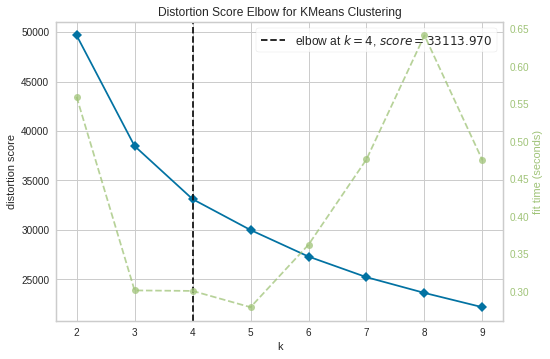

In [41]:
# Melihat grafik Elbow Method
print('Elbow Method')
Elbow_M = KElbowVisualizer(KMeans(), k=9)
Elbow_M.fit(data_reduced)
Elbow_M.show()

In [42]:
k=[2,3,4,5,6,7,8,9]
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(data_reduced)
                for k in range(1, 9)]
inertias = [model.inertia_ for model in kmeans_per_k]

In [43]:
silhouette_scores = [silhouette_score(data_reduced, model.labels_)
                     for model in kmeans_per_k[1:]]

In [44]:
silhouette_scores

[0.24885771991102665,
 0.26134767092124467,
 0.2337772854538065,
 0.2327880915940252,
 0.2386672533321759,
 0.24270237184757348,
 0.23249098577093358]

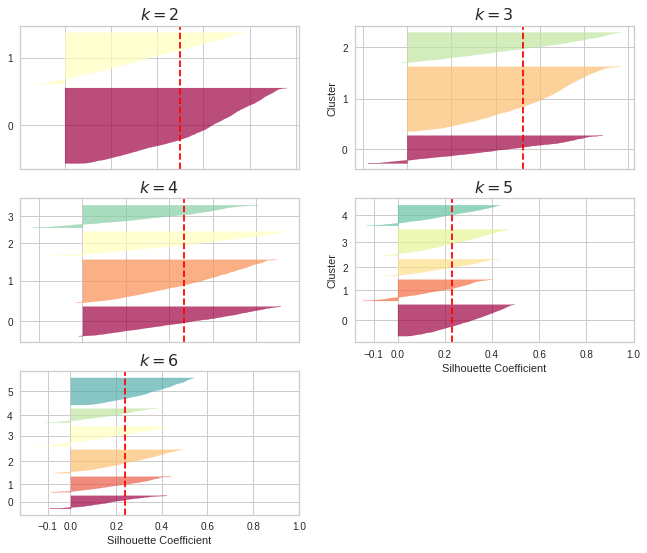

In [45]:
plt.figure(figsize=(11, 9))

for k in (2, 3, 4, 5, 6):
    plt.subplot(3, 2, k - 1)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(data_reduced, y_pred)

    padding = len(data_reduced) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

- Grafik shiluete menjelaskan bahwa:
    - 1 : pembagian antar cluster semakin jelas.
    - 0 : perbedaan antar cluster tidak signifikan.
    - -1 : kesalahan cluster.
- Pada shilouette score ini kita mencari grafik dengan bentuk siluete yang paling konsisten bentuknya. Disini kita melihat bahwa k=3 dan k=4 adalah bentuk yang paling konsisten, selanjutnya kita akan melihat dan membandingkan plot cluster berdasarkan k=3 dan k=4.

## K-means dengan k=4

In [46]:
#kmeans dengan k=4
kmeans = KMeans(n_clusters=4, random_state=26)
kmeans.fit(data_reduced)

KMeans(n_clusters=4, random_state=26)

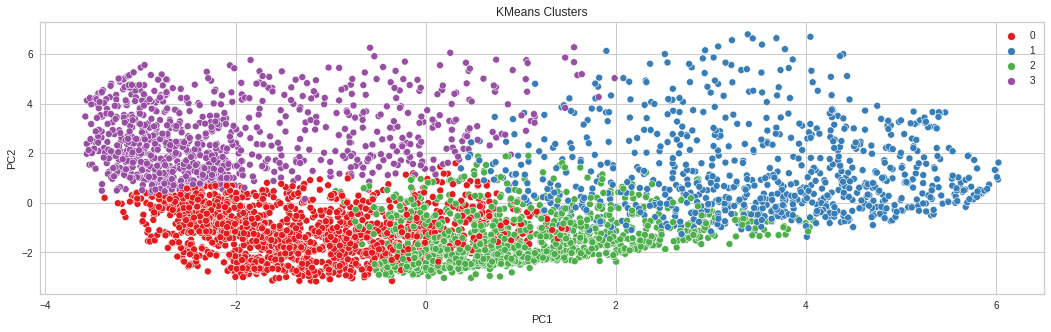

In [47]:
plt.figure(figsize=(18, 5))
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1], hue=kmeans.labels_, palette='Set1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KMeans Clusters')
plt.show()

Pemisah cluster tidak jelas, banyak data yang tumpang tindih seperti pada data hijau yang bercampur dengan merah daan hijau bercampur dengan biru. 


## K-means dengan k=3

In [48]:
#kmeans dengan k=3
kmeans = KMeans(n_clusters=3, random_state=26)
kmeans.fit(data_reduced)

KMeans(n_clusters=3, random_state=26)

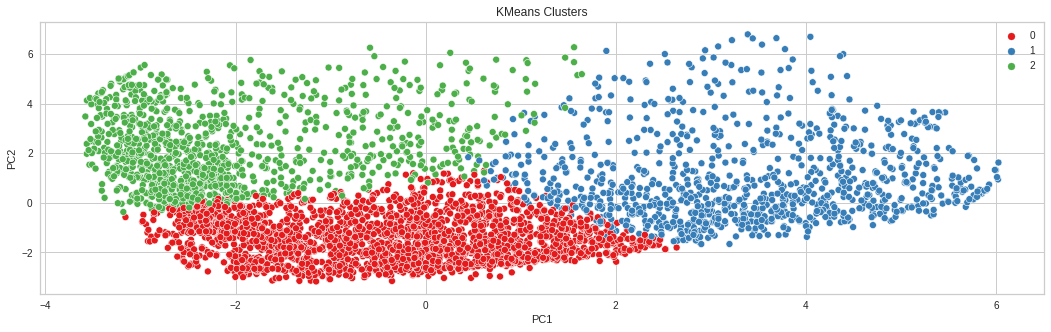

In [49]:
plt.figure(figsize=(18, 5))
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1], hue=kmeans.labels_, palette='Set1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KMeans Clusters')
plt.show()

Pemisah antar cluster terlihat dengan jelas, hanya ada sedikit data yang tumpang tindih. terlihat bahwa K-means denga n components = 3 lebih baik daripada n components = 4.

Kita mendapatkan hasil clustering data yang baik berdasarkan plot grafik KMeans dengan k=3, selanjutnya kita akan mengevaluasi model dengan melihat lebih lanjut karakteristik data yang terbentuk berdasarkan masing-masing cluster.

In [50]:
data_cluster1 = data
data_cluster1['cluster'] = kmeans.labels_
data_cluster1.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,3091,3.833185,0.125,45.00,45.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,500.0,0.000000,314.386305,0.0,8,0
1,5069,0.000000,0.000,176.03,176.03,0.0,0.0,0.125,0.125,0.0,0.0,0,1,7000.0,0.000000,314.386305,0.0,8,0
2,6075,757.964752,0.875,157.40,157.40,0.0,0.0,0.125,0.125,0.0,0.0,0,6,1200.0,1494.480376,2638.598410,0.0,8,0
3,6291,264.566591,0.375,1150.00,1150.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1200.0,3029.380326,85.428885,0.0,8,0
4,7755,440.613643,1.000,600.00,600.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1000.0,215.316424,137.846006,0.0,8,0


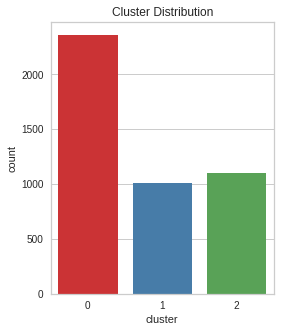

In [51]:
#plot histogram cluster
plt.figure(figsize=(4, 5))
sns.countplot(data=data_cluster1, x='cluster', palette='Set1')
plt.title('Cluster Distribution')
plt.show()

In [52]:
#melihat jumlah anggota masing-masing cluster
data_cluster1['cluster'].value_counts()

0    2359
2    1098
1    1008
Name: cluster, dtype: int64

Terdapat 2359 data pada cluster 0, 1008 data pada cluster 1 dan 1098 data pada cluster 2.

In [53]:
data_cluster1['cluster'].unique()

array([0, 1, 2], dtype=int32)

In [54]:
# Melihat Anggota Cluster 0
cluster0 = data[data['cluster'] == 0 ]
cluster0

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,3091,3.833185,0.125000,45.00,45.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,500.0,0.000000,314.386305,0.00,8,0
1,5069,0.000000,0.000000,176.03,176.03,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,7000.0,0.000000,314.386305,0.00,8,0
2,6075,757.964752,0.875000,157.40,157.40,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,6,1200.0,1494.480376,2638.598410,0.00,8,0
3,6291,264.566591,0.375000,1150.00,1150.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1200.0,3029.380326,85.428885,0.00,8,0
4,7755,440.613643,1.000000,600.00,600.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,215.316424,137.846006,0.00,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4444,8037,617.413726,1.000000,0.00,0.00,0.00,1420.758241,0.000000,0.000000,0.000000,0.272727,4,0,2000.0,385.654237,229.411418,0.00,11,0
4447,4465,736.724142,1.000000,421.96,0.00,421.96,1001.547474,1.000000,0.000000,0.909091,0.272727,14,11,1000.0,555.342356,586.925700,0.00,11,0
4452,5471,449.123098,1.000000,65.00,65.00,0.00,354.816958,0.090909,0.090909,0.000000,0.272727,6,1,2500.0,118.654655,239.240948,0.00,11,0
4456,7211,1135.703750,1.000000,92.07,0.00,92.07,81.509491,0.272727,0.000000,0.181818,0.272727,3,3,1200.0,355.798199,434.689529,0.00,11,0


In [55]:
#mengecek distribusi cluster 0
cluster0.describe()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
count,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.00000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.0
mean,4545.933446,562.937011,0.800846,386.200297,176.177490,210.187707,194.465591,0.451627,0.105287,0.342371,0.046199,0.732514,7.27554,3118.550511,745.308857,434.597065,0.168264,11.431115,0.0
std,2590.183756,716.992921,0.291204,410.169181,343.330815,300.778715,453.659457,0.368866,0.190797,0.376652,0.082372,1.417840,7.44271,2693.286037,1349.892247,1220.975756,0.299122,1.455380,0.0
min,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,150.000000,0.000000,0.019163,0.000000,6.000000,0.0
25%,2336.000000,36.587948,0.636364,66.225000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.00000,1200.000000,234.017831,134.564388,0.000000,12.000000,0.0
50%,4547.000000,185.924664,1.000000,269.750000,0.000000,80.440000,0.000000,0.416667,0.000000,0.166667,0.000000,0.000000,6.00000,2100.000000,458.251229,193.498368,0.000000,12.000000,0.0
75%,6808.000000,999.558797,1.000000,568.265000,200.000000,334.825000,133.645384,0.833333,0.142857,0.666667,0.083333,1.000000,12.00000,4000.000000,863.529098,350.059354,0.200000,12.000000,0.0
max,8949.000000,4543.789386,1.000000,2953.030000,2953.030000,2309.780000,7894.578816,1.000000,1.000000,1.000000,0.666667,14.000000,78.00000,23000.000000,29272.486070,20316.096310,1.000000,12.000000,0.0


In [56]:
# Melihat Anggota Cluster 1
cluster1 = data[data['cluster'] == 1 ]
cluster1

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
36,2251,1042.816735,0.625000,3950.00,3950.00,0.00,0.000000,0.250000,0.250000,0.000000,0.000000,0,3,3150.0,6274.982741,303.462882,0.000000,8,1
42,2971,1670.146578,0.727273,3420.97,3420.97,0.00,0.000000,0.250000,0.250000,0.000000,0.000000,0,31,2700.0,1164.552612,1283.600242,0.125000,12,1
65,4637,670.177406,0.818182,4562.69,4562.69,0.00,0.000000,0.250000,0.250000,0.000000,0.000000,0,5,9000.0,5060.217400,165.965951,0.000000,12,1
106,8809,327.576438,0.545455,2352.24,2352.24,0.00,0.000000,0.250000,0.250000,0.000000,0.000000,0,16,6500.0,3931.602949,225.579276,0.000000,12,1
125,771,145.085902,1.000000,1284.74,1284.74,0.00,0.000000,0.500000,0.500000,0.000000,0.000000,0,16,3000.0,2524.474539,167.031924,0.166667,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4380,6057,3682.768495,1.000000,1194.15,987.59,206.56,1074.785954,1.000000,0.250000,0.916667,0.416667,10,52,4050.0,2121.026757,1837.003889,0.000000,12,1
4381,6719,6443.077147,0.909091,2155.13,1325.34,829.79,1650.039631,1.000000,0.583333,1.000000,0.416667,17,75,7500.0,9689.602075,3163.402977,0.000000,12,1
4407,3697,5368.192094,1.000000,4050.01,3863.11,186.90,4843.394482,0.666667,0.583333,0.166667,0.416667,13,32,13000.0,14290.996270,1337.235636,0.000000,12,1
4408,1335,4677.021295,1.000000,1798.66,1364.22,434.44,1569.577102,0.916667,0.583333,0.916667,0.416667,6,36,9000.0,1156.783897,1615.317615,0.000000,12,1


In [57]:
##mengecek distribusi cluster 1
cluster1.describe()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
count,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.0
mean,4414.928571,1963.576920,0.975233,3281.570288,2060.432579,1221.732946,613.951366,0.909035,0.559291,0.687942,0.080863,2.083333,45.135913,6415.823413,3424.847865,1216.971733,0.243783,11.860119,1.0
std,2596.472389,2312.111753,0.084297,3372.604343,2966.913060,1516.687130,1781.788953,0.158854,0.336037,0.351510,0.161497,5.599954,39.072494,4141.455486,4076.300937,3864.888736,0.355368,0.688447,0.0
min,3.000000,1.632453,0.181818,452.590000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,2.000000,300.000000,0.000000,0.261984,0.000000,6.000000,1.0
25%,2260.000000,344.390891,1.000000,1538.917500,624.310000,302.727500,0.000000,0.900000,0.250000,0.416667,0.000000,0.000000,22.000000,3000.000000,1330.427334,188.495634,0.000000,12.000000,1.0
50%,4391.000000,1167.228617,1.000000,2346.535000,1357.660000,847.515000,0.000000,1.000000,0.583333,0.833333,0.000000,0.000000,34.000000,6000.000000,2204.997491,390.040029,0.000000,12.000000,1.0
75%,6658.500000,2651.544282,1.000000,3766.850000,2474.332500,1592.715000,351.363161,1.000000,0.916667,1.000000,0.083333,1.000000,53.000000,8500.000000,3905.329535,1107.041572,0.416667,12.000000,1.0
max,8941.000000,18495.558550,1.000000,41050.400000,40624.060000,14686.100000,27296.485760,1.000000,1.000000,1.000000,1.000000,51.000000,347.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000,1.0


In [58]:
## Melihat Anggota Cluster 2
cluster2 = data[data['cluster'] == 2 ]
cluster2

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
46,3161,6937.806466,1.000000,339.75,0.00,339.75,0.000000,0.250000,0.000000,0.250000,0.000000,0,3,10500.0,2163.154746,3228.084937,0.0,12,2
111,15,5429.372649,1.000000,493.10,0.00,493.10,0.000000,0.500000,0.000000,0.500000,0.000000,0,6,12000.0,1415.589572,1440.327788,0.0,12,2
176,4979,4751.340645,1.000000,309.86,0.00,309.86,0.000000,0.500000,0.000000,0.500000,0.000000,0,5,8600.0,5883.427252,1488.472099,0.0,12,2
1139,6401,5686.466725,0.909091,177.35,177.35,0.00,0.000000,0.090909,0.090909,0.000000,0.000000,0,1,8000.0,1775.784106,1724.337874,0.0,11,2
1226,3265,6619.148640,1.000000,35.92,0.00,35.92,0.000000,0.083333,0.000000,0.083333,0.000000,0,1,13500.0,2071.643344,1797.588069,0.0,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4460,2345,9629.808851,1.000000,0.00,0.00,0.00,4372.393835,0.000000,0.000000,0.000000,0.545455,9,0,12000.0,2468.988022,2134.295731,0.0,11,2
4461,6785,1040.030221,1.000000,0.00,0.00,0.00,1390.648290,0.000000,0.000000,0.000000,0.545455,18,0,1400.0,290.129620,287.994171,0.0,11,2
4462,7347,1322.818587,1.000000,0.00,0.00,0.00,762.301096,0.000000,0.000000,0.000000,0.545455,11,0,1500.0,1035.627320,312.835530,0.0,11,2
4463,8447,1060.391273,1.000000,0.00,0.00,0.00,1475.858013,0.000000,0.000000,0.000000,0.545455,10,0,2000.0,407.360560,277.084736,0.0,11,2


In [59]:
##mengecek distribusi cluster 2
cluster2.describe()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
count,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.0
mean,4384.928962,3351.969468,0.950662,243.894918,159.395820,84.530719,3024.323063,0.191420,0.083830,0.113629,0.380266,9.939891,3.715847,5706.075785,2338.931388,1429.308065,0.025046,11.397996,2.0
std,2554.894603,2446.621180,0.123459,576.888909,522.397814,243.787908,2883.163248,0.301394,0.169826,0.255126,0.215211,10.701896,6.943144,3576.957487,2886.112719,2381.698153,0.081740,1.428029,0.0
min,1.000000,30.287602,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,19.492021,0.000000,6.000000,2.0
25%,2119.500000,1527.846006,1.000000,0.000000,0.000000,0.000000,1243.513610,0.000000,0.000000,0.000000,0.250000,4.000000,0.000000,3000.000000,709.872131,467.999892,0.000000,12.000000,2.0
50%,4430.000000,2703.775026,1.000000,0.000000,0.000000,0.000000,2407.334545,0.000000,0.000000,0.000000,0.333333,7.000000,0.000000,5000.000000,1377.763318,909.586913,0.000000,12.000000,2.0
75%,6560.000000,4746.152516,1.000000,329.205000,146.547500,0.000000,3862.147408,0.250000,0.083333,0.000000,0.500000,12.000000,5.000000,8000.000000,2821.160392,1647.089760,0.000000,12.000000,2.0
max,8947.000000,16115.596400,1.000000,12650.000000,12650.000000,3887.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,68.000000,19600.000000,39048.597620,42629.551170,1.000000,12.000000,2.0


Text(0.5, 1.0, 'CREDIT_LIMIT')

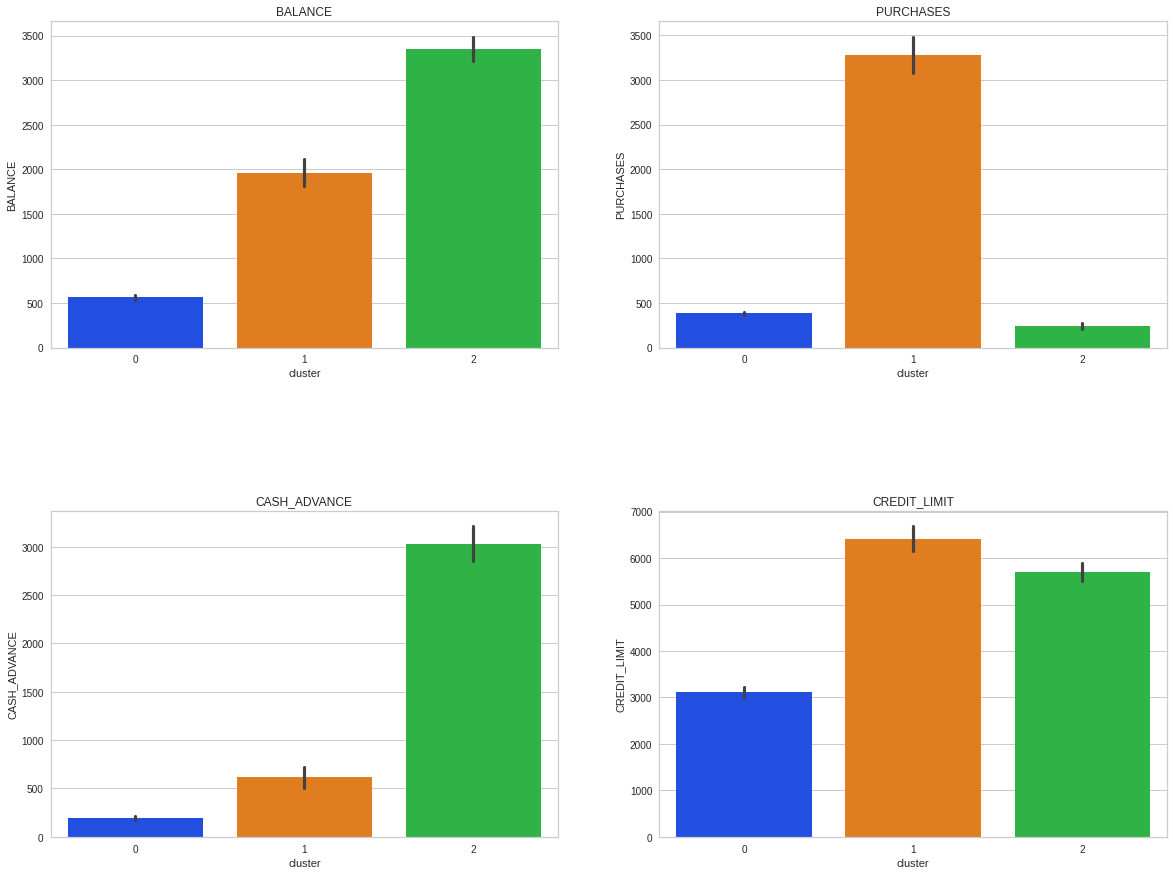

In [60]:
# Show barplot of clusters

fig,axs = plt.subplots(2,2, figsize = (20,15))
plt.subplot(2, 2, 1)
plt.subplots_adjust(hspace = 0.5)
sns.barplot(x= 'cluster', y = 'BALANCE', data = data_cluster1, palette='bright')
plt.title('BALANCE')

plt.subplot(2, 2, 2)
sns.barplot(x= 'cluster', y = 'PURCHASES', data = data_cluster1, palette='bright')
plt.title('PURCHASES')


plt.subplot(2, 2, 3)
sns.barplot(x= 'cluster', y = 'CASH_ADVANCE', data = data_cluster1, palette='bright')
plt.title('CASH_ADVANCE')


plt.subplot(2, 2, 4)
sns.barplot(x= 'cluster', y = 'CREDIT_LIMIT', data = data_cluster1, palette='bright')
plt.title('CREDIT_LIMIT')


Terlihat bahwa pada cluster 1 adalah kelompok nasabah dengan Credit limit tertinggi dan jumlah purchase paling banyak, sedangkan pada cluster 2 adalah kelompok nasabah dengan Balance dan Cash Advance tertinggi dan cluster 0 adalah keompok nasabah dengan limit balance, purchase, credit limit dan cash advance paling rendah.

# Agglomerative

In [61]:
# Definisi Model Agglomerative
agglo = AgglomerativeClustering(n_clusters=2)
agglo.fit(data_reduced)

AgglomerativeClustering()

In [62]:
data_cluster3 = data
data_cluster3['cluster'] = agglo.labels_
data_cluster3.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,3091,3.833185,0.125,45.00,45.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,500.0,0.000000,314.386305,0.0,8,0
1,5069,0.000000,0.000,176.03,176.03,0.0,0.0,0.125,0.125,0.0,0.0,0,1,7000.0,0.000000,314.386305,0.0,8,0
2,6075,757.964752,0.875,157.40,157.40,0.0,0.0,0.125,0.125,0.0,0.0,0,6,1200.0,1494.480376,2638.598410,0.0,8,0
3,6291,264.566591,0.375,1150.00,1150.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1200.0,3029.380326,85.428885,0.0,8,0
4,7755,440.613643,1.000,600.00,600.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1000.0,215.316424,137.846006,0.0,8,0


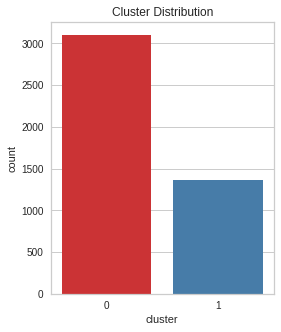

In [63]:
plt.figure(figsize=(4, 5))
sns.countplot(data=data_cluster3, x='cluster', palette='Set1')
plt.title('Cluster Distribution')
plt.show()

In [64]:
data_cluster3['cluster'].value_counts()

0    3101
1    1364
Name: cluster, dtype: int64

Terbentuk 2 cluster menggunakan metode Agglomerative Model, dimana masing-masing cluster beranggotakan 3.101 data dan 1.364 data.

#DBSCAN

In [65]:
# Definisi model DBSCAN
#dengan epsilon 0.05
dbscan = DBSCAN(eps=0.05, min_samples=4)
dbscan.fit(data_reduced)

DBSCAN(eps=0.05, min_samples=4)

In [66]:
# Definisi model DBSCAN
# dengan epsilon 0.2
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(data_reduced)

DBSCAN(eps=0.2)

In [67]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

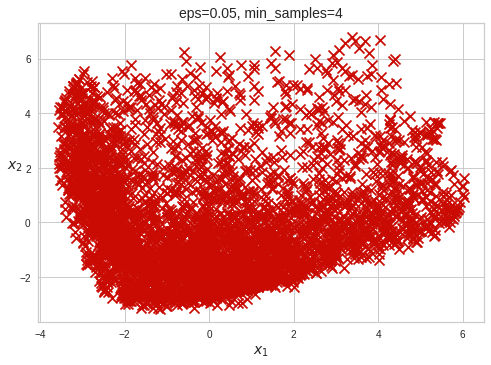

In [68]:
#plot DBSCAN eps = 0.05
plot_dbscan(dbscan,data_reduced,size=100)

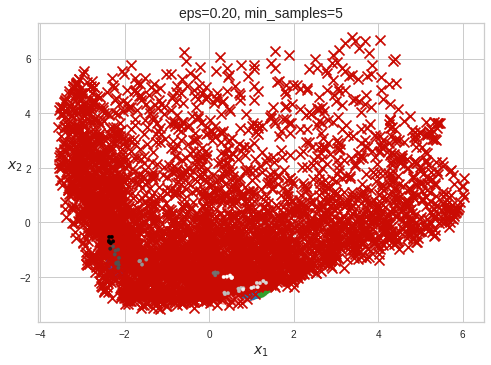

In [72]:
# plot DBSCAN eps = 0.2
plot_dbscan(dbscan2,data_reduced,size=600)

In [73]:
#plot DBSCAN dengan Make Moon
data_reduced, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

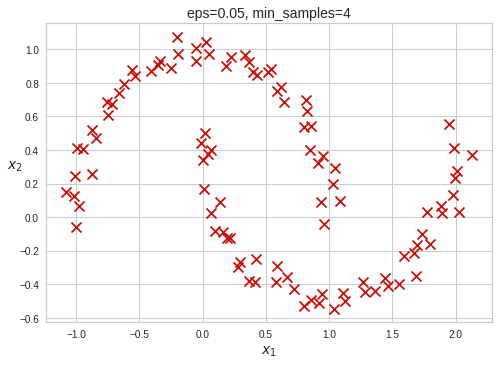

In [77]:
#plot DBSCAN eps = 0.05 dengan Make Moon
plot_dbscan(dbscan,data_reduced,size=100)

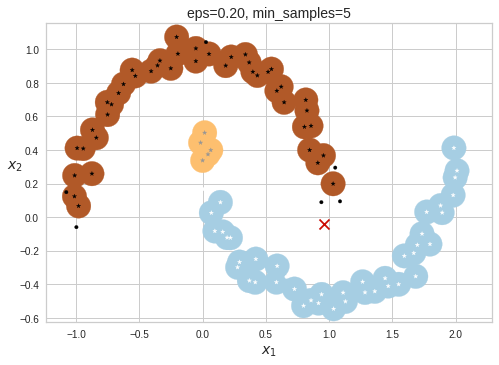

In [78]:
# plot DBSCAN eps = 0.2 dengan Make Moon
plot_dbscan(dbscan2,data_reduced,size=600)

In [69]:
data_cluster2 = data
data_cluster2['cluster'] = dbscan.labels_
data_cluster2.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,3091,3.833185,0.125,45.00,45.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,500.0,0.000000,314.386305,0.0,8,-1
1,5069,0.000000,0.000,176.03,176.03,0.0,0.0,0.125,0.125,0.0,0.0,0,1,7000.0,0.000000,314.386305,0.0,8,-1
2,6075,757.964752,0.875,157.40,157.40,0.0,0.0,0.125,0.125,0.0,0.0,0,6,1200.0,1494.480376,2638.598410,0.0,8,-1
3,6291,264.566591,0.375,1150.00,1150.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1200.0,3029.380326,85.428885,0.0,8,-1
4,7755,440.613643,1.000,600.00,600.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1000.0,215.316424,137.846006,0.0,8,-1


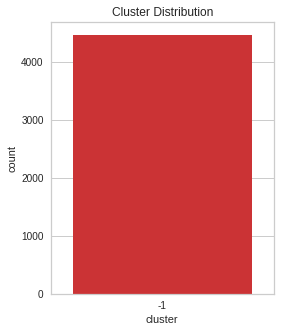

In [70]:
plt.figure(figsize=(4, 5))
sns.countplot(data=data_cluster2, x='cluster', palette='Set1')
plt.title('Cluster Distribution')
plt.show()

In [71]:
data_cluster2['cluster'].value_counts()

-1    4465
Name: cluster, dtype: int64

- Terdapat hanya 1 cluster yang terbentuk menggunakan DBSCAN.

- Model terbaik yang kita dapatkan adalah dengan menggunakan Model K-means dengan nilai **k=3**. Maka selanjutnya kita akan menyimpan dan menggunakan model ini untuk memprediksi cluster pada data baru yaitu data Inference.



# 9 - Model Inference
> Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

In [90]:
# save model
with open('kmeans.pkl', 'wb') as file_1 :
  joblib.dump(kmeans, file_1)

with open('scaler.pkl', 'wb') as file_2 :
  joblib.dump(scaler, file_2)

In [91]:
# load model
with open('kmeans.pkl', 'rb') as file_1:
  kmeans = joblib.load(file_1)

with open('scaler.pkl', 'rb') as file_2:
  scaler = joblib.load(file_2)

In [92]:
#Display Inference-Set

data_inf

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,4703,1497.869891,1.000000,806.64,681.69,124.95,0.000000,0.833333,0.750000,0.416667,0.000000,0,26,1700.0,826.296904,857.418392,0.000000,12
1,7433,22.187914,1.000000,0.00,0.00,0.00,147.485270,0.000000,0.000000,0.000000,0.083333,1,0,3000.0,182.533898,155.060934,0.083333,12
2,8319,2261.132204,0.888889,0.00,0.00,0.00,840.322560,0.000000,0.000000,0.000000,0.333333,4,0,2500.0,783.359871,609.884322,0.000000,9
3,1851,11.834127,0.166667,272.90,69.90,203.00,0.000000,0.833333,0.166667,0.500000,0.000000,0,5,6000.0,313.913093,81.433073,1.000000,6
4,1061,1116.443170,1.000000,0.00,0.00,0.00,18.904244,0.000000,0.000000,0.000000,0.083333,1,0,1200.0,264.159577,312.807548,0.000000,12
5,2665,601.688280,0.800000,1358.20,468.33,889.87,0.000000,0.800000,0.200000,0.700000,0.000000,0,26,1500.0,310.912113,157.872552,0.000000,10
6,3545,31.050921,1.000000,446.05,0.00,446.05,0.000000,1.000000,0.000000,0.909091,0.000000,0,11,1000.0,387.745745,158.394845,1.000000,11
7,739,1055.369866,0.545455,0.00,0.00,0.00,3776.644822,0.000000,0.000000,0.000000,0.166667,2,0,6000.0,2924.470714,195.294122,0.000000,12
8,5977,827.000420,1.000000,0.00,0.00,0.00,965.526999,0.000000,0.000000,0.000000,0.250000,20,0,1000.0,333.441983,326.953822,0.000000,12
9,575,204.584048,0.818182,0.00,0.00,0.00,628.366944,0.000000,0.000000,0.000000,0.250000,3,0,1600.0,1933.810453,152.106855,0.000000,12


In [93]:
data_inf1 = data_inf.drop(columns=['CUST_ID'])


In [94]:
#feature scaling 

data_inf_scaled = scaler.transform(data_inf1)

In [95]:
pca = PCA(n_components=8)
pca.fit(data_inf_scaled )
data_inf_reduced = pca.transform(data_inf_scaled)

In [96]:
data_inf_reduced

array([[-1.34149600e+00,  3.88158705e+00,  2.54113151e-01,
        -6.10267994e-01,  1.06105089e+00, -1.64604652e+00,
         3.41575372e-02,  3.49900480e-02],
       [-1.50250387e+00,  2.40931884e-02,  5.00099879e-01,
         1.06074357e+00, -1.36872692e+00, -1.05261436e-01,
        -6.85614438e-01, -3.72871279e-01],
       [-1.41213162e+00, -1.15867375e+00, -1.70586960e+00,
        -1.19384670e+00, -1.16226374e+00, -2.87533140e-01,
         1.36653318e+00, -1.43904675e-02],
       [ 8.32817724e+00, -1.46980358e+00, -1.95847991e+00,
        -9.99860324e-01,  5.18865761e-02, -5.10345161e-01,
        -6.42659041e-01,  4.61479379e-03],
       [-2.13603531e+00,  2.94170710e-01,  3.46156541e-01,
         7.56724176e-01, -1.53781519e+00, -1.81313423e-01,
        -2.38600578e-01, -3.08122634e-01],
       [-1.14283217e-01,  3.01736474e+00, -8.98568233e-01,
        -1.41237529e+00,  1.92289520e-01,  1.93433394e+00,
        -1.41197497e-01, -2.84760442e-02],
       [ 6.17235571e+00,  3.690970

In [97]:
#Predict using kmeans
y_pred_inf = kmeans.predict(data_inf_reduced)
y_pred_inf

array([2, 0, 0, 1, 2, 2, 1, 0, 0, 0], dtype=int32)

In [98]:
# Create DataFrame of Cluster's Prediction

y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['Cluster Prediction'])
y_pred_inf_df

,Cluster Prediction
0,2
1,0
2,0
3,1
4,2
5,2
6,1
7,0
8,0
9,0


In [99]:
# Concate between Inference-Set and Cluster's Prediction

pd.concat([data_inf1, y_pred_inf_df], axis = 1)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster Prediction
0,1497.869891,1.000000,806.64,681.69,124.95,0.000000,0.833333,0.750000,0.416667,0.000000,0,26,1700.0,826.296904,857.418392,0.000000,12,2
1,22.187914,1.000000,0.00,0.00,0.00,147.485270,0.000000,0.000000,0.000000,0.083333,1,0,3000.0,182.533898,155.060934,0.083333,12,0
2,2261.132204,0.888889,0.00,0.00,0.00,840.322560,0.000000,0.000000,0.000000,0.333333,4,0,2500.0,783.359871,609.884322,0.000000,9,0
3,11.834127,0.166667,272.90,69.90,203.00,0.000000,0.833333,0.166667,0.500000,0.000000,0,5,6000.0,313.913093,81.433073,1.000000,6,1
4,1116.443170,1.000000,0.00,0.00,0.00,18.904244,0.000000,0.000000,0.000000,0.083333,1,0,1200.0,264.159577,312.807548,0.000000,12,2
5,601.688280,0.800000,1358.20,468.33,889.87,0.000000,0.800000,0.200000,0.700000,0.000000,0,26,1500.0,310.912113,157.872552,0.000000,10,2
6,31.050921,1.000000,446.05,0.00,446.05,0.000000,1.000000,0.000000,0.909091,0.000000,0,11,1000.0,387.745745,158.394845,1.000000,11,1
7,1055.369866,0.545455,0.00,0.00,0.00,3776.644822,0.000000,0.000000,0.000000,0.166667,2,0,6000.0,2924.470714,195.294122,0.000000,12,0
8,827.000420,1.000000,0.00,0.00,0.00,965.526999,0.000000,0.000000,0.000000,0.250000,20,0,1000.0,333.441983,326.953822,0.000000,12,0
9,204.584048,0.818182,0.00,0.00,0.00,628.366944,0.000000,0.000000,0.000000,0.250000,3,0,1600.0,1933.810453,152.106855,0.000000,12,0


# 10 - Pengambilan Kesimpulan

> Pada bagian terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.

- Pada model K-Means menggunakan k=4, batas antar cluster tidak terlihat begitu jelas, masih banyak terdapat tumpang tindih data.

- Pada model K-Means dengan nilai k=3 terlihat batas yang jelas pada masing-masing cluster.

- Terbentuk 2 cluster menggunakan metode Agglomerative Model, dimana masing-masing cluster beranggotakan 3.101 data dan 1.364 data.

- Terdapat hanya 1 cluster yang terbentuk menggunakan DBSCAN.

- Hasil cluster terbaik berdasarkan grafiknya adalah menggunakan metode **K-Means** dengan **k=3** dan menghasilkan 3 cluster dengan masing-masing anggota cluster sebagai berikut:

- Cluster 1 yang didapatkan berisikan segmentasi customer dengan Credit limit tertinggi dan jumlah purchase paling banyak.
- Cluster 2 adalah segmentasi customer dengan Balance dan Cash Advance tertinggi.
- Cluster 0 adalah segmentasi customer dengan limit balance, purchase, credit limit dan cash advance paling rendah.

# Conceptual Problems

> Jawab pertanyaan berikut:

- Apakah yang dimaksud dengan inertia pada algoritma K-Means ?

- Jelaskan yang dimaksud dengan Elbow Method (alasan penggunaan, cara penggunaan, kelemahan/kelebihan, dll) !

- Jelaskan perbedaan masing-masing algoritma clustering yang anda gunakan dalam kasus ini !

> Jawaban:

- Salah satu cara untuk menentukan k  pada K-Means adalah dengan menggunakan jumlah kelas aslinya. Sayangnya, algoritma seperti k-Means tidak dapat menemukan nilai k-nya sendiri. Jadi, nilai k biasanya merupakan masukan dari pengguna. Oleh karena itu, kita dapat menggunakan elbow method dari scree plot.

  Untuk menghasilkan scree plot, kita perlu menghitung nilai total jarak antara tiap titik dengan centroid terdekatnya. Total jarak itulah yang dinamakan **Inertia**.

- Elbow method adalah metode yang sering dipakai untuk menentukan jumlah cluster yang akan digunakan pada k-means clustering. Cara membaca elbow methods adalah dengan melihat nilai patahan grafiknya, dimana grafik mulai terlihat melandai / tidak terjadi perubahan ekstrim.

  Metode elbow juga sangat mudah diimplementasikan dengan cara melihat grafik dari nilai k yang akan diinputkan. Nilai fungsi k yang akan dibandingkan pada metode elbow adalah dengan melihat nilai SSE (Sum of Square Error) pada nilai cluster yang ditentukan. Hasil jumlah cluster k terbaik akan dijadikan dasar untuk melakukan proses clustering dengan menggunakan metode K-Means.

- K-means adalah metode clustering berdasarkan jarak terhadap centoridnya, dengan meminimalkan jumlah titik jarak yang sesuai antar cluster.
- DBSCAN adalah Density-Based Spatial Clustering of Application with Noise (DBSCAN) merupakan sebuah metode clustering yang membangun area berdasarkan kepadatan yang terkoneksi (density- connected). Setiap objek dari sebuah radius area (cluster) harus mengandung setidaknya sejumlah minimum data.
- Agglomerative Hierarchical Clustering adalah metode pengelompokan data yang dimulai dengan setiap satu pengamatan sebagai clusternya sendiri kemudian terus mengelompokkan pengamatan ke dalam kelompok yang semakin besar.